# STAT 207 Lab 9: Linear Regression - [25 total points] - Solutions

Due: Wednesday, April 7 11:59pm CST



## <u>Case Study </u>: Weekend Smoking Habits of U.K. Smokers
We are interested in learning more about the relationship between how many cigarettes U.K. smokers smoke on the weekends and the following additional factors:
* the amount they smoke the weekdays
* age
* marital status
* sex.

Specifically, we would like to see if these variables can predict the amount that U.K. smokers smoke on the weekends.

The smoking.csv dataset contains a random sample of 421 U.K. smokers.


### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Read in the smoking.csv into a dataframe.

In [2]:
df = pd.read_csv('smoking.csv')
df.head()

,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Female,42,Single,No Qualification,British,"Under 2,600",The North,Yes,12,12,Packets
1,Male,53,Married,Degree,British,"Above 36,400",The North,Yes,6,6,Packets
2,Male,40,Single,GCSE/CSE,English,"2,600 to 5,200",The North,Yes,8,8,Hand-Rolled
3,Female,41,Married,No Qualification,English,"5,200 to 10,400",The North,Yes,15,12,Packets
4,Female,34,Married,GCSE/CSE,British,"2,600 to 5,200",The North,Yes,6,12,Packets


### 1. [1.5 pt] Visualize the relationship between the amount that the smokers in the dataset smoke on the weekend vs. smoke on the weekdays. 

### Then, use this plot to describe the relationship. Remember there are four things you should be ready to discuss.


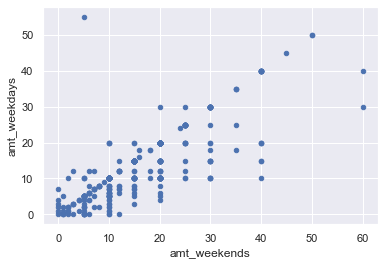

In [3]:
df.plot.scatter(x = 'amt_weekends', y = 'amt_weekdays', c = 'b')
plt.show()

The relationship between the two variables is linear and positive. The relationship is strongly linear; however, there do appear to be outliers.

### 2. [1 pt] Calculate the correlation between the amount that the smokers in the dataset smoke on the weekend vs. smoke on the weekdays and interpret it.

In [8]:
df.corr()
rxy = df.corr().iloc[1,2]
rxy


0.8020521245005168

There is a strong positive relationship between the amount smoked on weekend and weekdays

### 3. [0.5 pt]  Can you use this correlation to describe the strength of the relationship between the amount smoked on the weekdays and the weekend. Why or why not?

Yes, becuase we already said that the relationship is visually linear

### 4. [1 pt]  In one figure (a figure can have multiple plots), visualize the relationship between the amount smoked on the weekdays and the weekends for every combination of sex and marital status. Plot a best fit line for each of these combinations (also in the same figure.

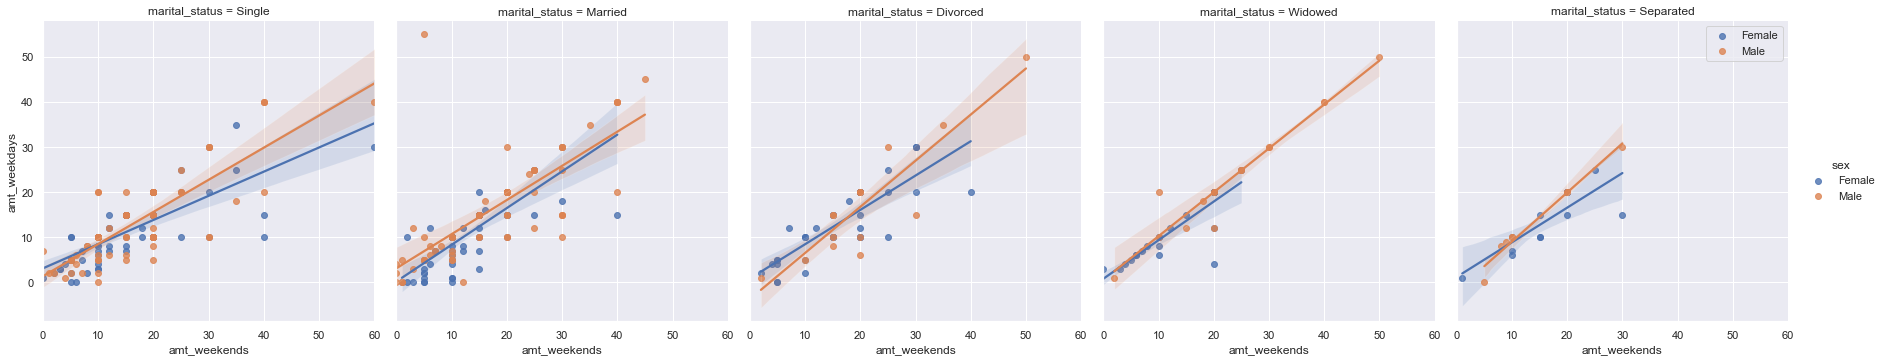

In [9]:
sns.lmplot(x = 'amt_weekends', y = 'amt_weekdays', hue = 'sex', col = 'marital_status', data = df)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

### 5. [1 pt]  Out of the 10 combinations of sex and marital status given in the data, which has the strongest linear association between the amount smoked on the weekdays and the amount smoked on the weekend. Which one had the weakest?

In [10]:
combos = df.groupby(['sex','marital_status']).corr()
print(combos)

                                         age  amt_weekends  amt_weekdays
sex    marital_status                                                   
Female Divorced       age           1.000000      0.033771      0.027449
                      amt_weekends  0.033771      1.000000      0.825356
                      amt_weekdays  0.027449      0.825356      1.000000
       Married        age           1.000000      0.192906      0.270235
                      amt_weekends  0.192906      1.000000      0.805186
                      amt_weekdays  0.270235      0.805186      1.000000
       Separated      age           1.000000     -0.184835     -0.238553
                      amt_weekends -0.184835      1.000000      0.825585
                      amt_weekdays -0.238553      0.825585      1.000000
       Single         age           1.000000      0.087175      0.183180
                      amt_weekends  0.087175      1.000000      0.757588
                      amt_weekdays  0.183180      0

Separated males had the strongest correlation (0.985) and married males had the weakest correlation (0.742).

### 6. [2 pt]  Next, fit a linear regression model which has a response variable of the amount smoked on the weekend and the following explanatory variables:
* amount smoked on the weekdays
* sex
* age
* marital status

### Write out your multiple linear regression model equation.

In [11]:
results = smf.ols('amt_weekends ~ amt_weekdays + sex + age + marital_status', data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           amt_weekends   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     112.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.01e-91
Time:                        22:25:01   Log-Likelihood:                -1337.5
No. Observations:                 421   AIC:                             2691.
Df Residuals:                     413   BIC:                             2723.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.7400      1.450      5.340      0.000       4.891      10.589
sex[T.Male]                    -0.0387      0.600     -0.065      0.948      -1.217       1.140
marital_status[T.Married]      -1.3727      0.922     -1.488      0.137      -3.186       0.440
marital_status[T.Separated]    -1.6299      1.473     -1.107      0.269      -4.525       1.265
marital_status[T.Single]       -0.6161      1.012     -0.609      0.543      -2.606       1.373
marital_status[T.Widowed]      -1.0180      1.327     -0.767      0.443      -3.626       1.590
amt_weekdays                    0.8655      0.032     27.290      0.000       0.803       0.928
age                            -0.0546      0.026     -2.135      0.033      -0.105      -0.004
==============================================================================
Omnibus:                       98.125   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2454.460
Skew:                           0.240   Prob(JB):                         0.00
Kurtosis:                      14.819   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7. [1 pt]  By hand, predict the amount of weekend cigarettes that are smoked by a 42 year old, single, female who smokes 12 cigarettes on the weekdays.

In [12]:
7.7400 + (-0.0387 * 0) + (-0.6161 * 1) + (-0.0546 * 42) + (0.8655 * 12)

15.216700000000001

### 8. [1 pt]  Using Python functions, predict the amount of weekend cigarettes that are smoked by a 42 year old single female who smokes 12 cigarettes on the weekdays.

(See the last part of the Unit 13 notebook for help.)

In [13]:
results.predict(exog=dict(age = 42, sex = 'Female', marital_status = 'Single', amt_weekdays = 12))

0    15.215399
dtype: float64

### 9 [0.5 pt] The first observation in the dataframe represents this smoker from the previous problem. What is the residual for this prediction we just calculated?

In [14]:
df.head()

,sex,age,marital_status,highest_qualification,nationality,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Female,42,Single,No Qualification,British,"Under 2,600",The North,Yes,12,12,Packets
1,Male,53,Married,Degree,British,"Above 36,400",The North,Yes,6,6,Packets
2,Male,40,Single,GCSE/CSE,English,"2,600 to 5,200",The North,Yes,8,8,Hand-Rolled
3,Female,41,Married,No Qualification,English,"5,200 to 10,400",The North,Yes,15,12,Packets
4,Female,34,Married,GCSE/CSE,British,"2,600 to 5,200",The North,Yes,6,12,Packets


In [15]:
15.215399 - 12

3.2153989999999997

### 10. [1 pt]  What percent of the variability of the amount of cigarettes smoked by this sample on the weekends is explained by the model?

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           amt_weekends   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     112.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.01e-91
Time:                        22:25:41   Log-Likelihood:                -1337.5
No. Observations:                 421   AIC:                             2691.
Df Residuals:                     413   BIC:                             2723.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.7400      1.450      5.340      0.000       4.891      10.589
sex[T.Male]                    -0.0387      0.600     -0.065      0.948      -1.217       1.140
marital_status[T.Married]      -1.3727      0.922     -1.488      0.137      -3.186       0.440
marital_status[T.Separated]    -1.6299      1.473     -1.107      0.269      -4.525       1.265
marital_status[T.Single]       -0.6161      1.012     -0.609      0.543      -2.606       1.373
marital_status[T.Widowed]      -1.0180      1.327     -0.767      0.443      -3.626       1.590
amt_weekdays                    0.8655      0.032     27.290      0.000       0.803       0.928
age                            -0.0546      0.026     -2.135      0.033      -0.105      -0.004
==============================================================================
Omnibus:                       98.125   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2454.460
Skew:                           0.240   Prob(JB):                         0.00
Kurtosis:                      14.819   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 = 0.655 , 65.5% of the variability can be explained by the model

### 11. [5 pt]  Check the five conditions for conducting inference on the population intercept and slopes associated with this model. Discuss whether each condition is or is not met.

Linearity Condition: The points in the plot below are not roughly evenly distributed above and below the line, so condition is not met

Constant Variability of Residual Condition: Because the y-axis spread of points in the plot below change as we move from left to right, we can say that this condition is not met

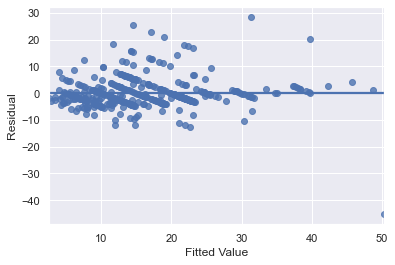

In [17]:
sns.regplot(x = results.fittedvalues, y = results.resid, ci = None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Normality of Residuals (with mean of 0) Condition: Not symmetric, slightly right-skewed

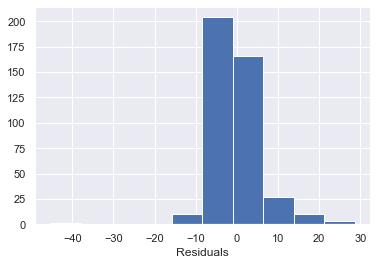

In [18]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

Independence of Residuals condition: Sample is random and n = 421 < 10% of all U.K. smokers

No multicollinearity Condition: not violated by our one pair of numerical explanatory variables

In [19]:
df[['age','amt_weekdays']].corr()

,age,amt_weekdays
age,1.000000,0.192783
amt_weekdays,0.192783,1.000000


### 12.  Next, we would like to test whether there is sufficient evidence to suggest that the age slope in the corresponding population model (ie. considering ALL U.K. smokers) is non-zero.

#### 12.1. [1 pt]  Formulate the hypotheses for this test.

$h_o$: $B_3$ = 0



$h_a$: $B_3$ != 0

#### 12.2 [2 pt]  Calculate a 90% confidence interval for this slope.

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           amt_weekends   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     112.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.01e-91
Time:                        22:26:21   Log-Likelihood:                -1337.5
No. Observations:                 421   AIC:                             2691.
Df Residuals:                     413   BIC:                             2723.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.7400      1.450      5.340      0.000       4.891      10.589
sex[T.Male]                    -0.0387      0.600     -0.065      0.948      -1.217       1.140
marital_status[T.Married]      -1.3727      0.922     -1.488      0.137      -3.186       0.440
marital_status[T.Separated]    -1.6299      1.473     -1.107      0.269      -4.525       1.265
marital_status[T.Single]       -0.6161      1.012     -0.609      0.543      -2.606       1.373
marital_status[T.Widowed]      -1.0180      1.327     -0.767      0.443      -3.626       1.590
amt_weekdays                    0.8655      0.032     27.290      0.000       0.803       0.928
age                            -0.0546      0.026     -2.135      0.033      -0.105      -0.004
==============================================================================
Omnibus:                       98.125   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2454.460
Skew:                           0.240   Prob(JB):                         0.00
Kurtosis:                      14.819   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
point_estimate = -0.0546
print('Point Estimate = Sample Slope = ', point_estimate)

Point Estimate = Sample Slope =  -0.0546


In [22]:
standard_error = 0.026
print('Standard Error: ', standard_error)

Standard Error:  0.026


In [23]:
from scipy.stats import t
critical_value = t.ppf(.95, df = 413) #421 - 7 - 1
print('Critical Value: ', critical_value)

Critical Value:  1.6485514808617563


In [24]:
ll = point_estimate - critical_value * standard_error
ul = point_estimate + critical_value * standard_error

print('90% Confidence Interval for the Age Population Slope in the Current Model:','(',ll, ',',ul,')')


90% Confidence Interval for the Age Population Slope in the Current Model: ( -0.09746233850240565 , -0.011737661497594344 )


We are 90% confident that the age slope in the multiple linear regression population model is between -0.09746 and -0.01173

#### 12.3 [0.5 pt]  Make a conclusion about your hypotheses using this confidence interval.

Becuase the null value is not inside of the confidence interval, we reject the null and say that there is sufficient evidence to suggest the alternative hypothesis

#### 12.4 [0.5 pt]  Calculate the test statistic for this test by hand. Verify this test statistic in your regression output table.

In [25]:
null_value = 0
test_stat = (point_estimate - null_value)/standard_error
print("Test Statistic: ", test_stat)

results.summary()

Test Statistic:  -2.1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           amt_weekends   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     112.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.01e-91
Time:                        22:26:34   Log-Likelihood:                -1337.5
No. Observations:                 421   AIC:                             2691.
Df Residuals:                     413   BIC:                             2723.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.7400      1.450      5.340      0.000       4.891      10.589
sex[T.Male]                    -0.0387      0.600     -0.065      0.948      -1.217       1.140
marital_status[T.Married]      -1.3727      0.922     -1.488      0.137      -3.186       0.440
marital_status[T.Separated]    -1.6299      1.473     -1.107      0.269      -4.525       1.265
marital_status[T.Single]       -0.6161      1.012     -0.609      0.543      -2.606       1.373
marital_status[T.Widowed]      -1.0180      1.327     -0.767      0.443      -3.626       1.590
amt_weekdays                    0.8655      0.032     27.290      0.000       0.803       0.928
age                            -0.0546      0.026     -2.135      0.033      -0.105      -0.004
==============================================================================
Omnibus:                       98.125   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2454.460
Skew:                           0.240   Prob(JB):                         0.00
Kurtosis:                      14.819   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test statistic by hand was calculated as -2.1 and the output table says that this number is -2.135

#### 12.5 [1 pt]  Use this test statistic to calculate the p-value for this hypothesis test (using the distribution that this test statistic is an observation from). Verify this p-value in your regression output table.

In [26]:
pvalue = 2 * (1 - t.cdf(np.abs(test_stat), df = 413))
print('p-value:', pvalue)

p-value: 0.036334878049917974


p-value by hand was calculated as 0.03633 and the output table says that this number is 0.033

#### 12.6 [0.5 pt]  Use this p-value to make a conclusion about your hypotheses, using a significance level of $\alpha=0.10$.

Because the p-value of 0.0363 < 0.10, we reject the null and say that there is sufficient evidence to suggest the alternative

#### 12.7 [1 pt]  What is the probability that the population slope for age was *actually* equal to zero in the previous test and that we incorrectly rejected it in our test?

10% because that is $\alpha\$

### 13. Next, we would like to test whether there is sufficient evidence to suggest that at least one of the population slopes in the corresponding population model (ie. considering ALL U.K. smokers) is non-zero.

#### 13.1 [1 pt]  Formulate the hypotheses for this test.

$h_o$: $B_1$ = $B_2$ = $B_3$ = $B_4$ = $B_5$ = $B_6$ = $B_7$ = 0


$h_a$: atleast one $B_i$ != 0

#### 13.2 [0.5 pt]  What is the test statistic for this hypothesis test?

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           amt_weekends   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     112.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           2.01e-91
Time:                        22:26:41   Log-Likelihood:                -1337.5
No. Observations:                 421   AIC:                             2691.
Df Residuals:                     413   BIC:                             2723.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.7400      1.450      5.340      0.000       4.891      10.589
sex[T.Male]                    -0.0387      0.600     -0.065      0.948      -1.217       1.140
marital_status[T.Married]      -1.3727      0.922     -1.488      0.137      -3.186       0.440
marital_status[T.Separated]    -1.6299      1.473     -1.107      0.269      -4.525       1.265
marital_status[T.Single]       -0.6161      1.012     -0.609      0.543      -2.606       1.373
marital_status[T.Widowed]      -1.0180      1.327     -0.767      0.443      -3.626       1.590
amt_weekdays                    0.8655      0.032     27.290      0.000       0.803       0.928
age                            -0.0546      0.026     -2.135      0.033      -0.105      -0.004
==============================================================================
Omnibus:                       98.125   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2454.460
Skew:                           0.240   Prob(JB):                         0.00
Kurtosis:                      14.819   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
test_stat_f = 112.2
print('Test Statistic:', test_stat_f)

Test Statistic: 112.2


#### 13.3 [1 pt]  Use the distribution that this test statistic is an observation from to calculate the p-value for this test.

In [29]:
df1 = 7 #number of slopes (p)
df2 = 421 - 7 - 1 #n - p - 1


from scipy.stats import f
p_value_2 = 1 - f.cdf(test_stat_f, dfn = 7, dfd = 413)
print('p-value: ', p_value_2)

p-value:  1.1102230246251565e-16


#### 13.4 [0.5 pt]  Make a conclusion about your hypotheses using a significance level of $\alpha=0.10$.

the p-value < 0.10, so we reject the null and say that there is not sufficient evidence to suggest the alternative